# Face Detection Algorithm Evaluation

Dataset: https://www.kaggle.com/datasets/sbaghbidi/human-faces-object-detection?resource=download
To run, please, copy the data to train/face_detection/data.

In [8]:
import pandas as pd
import os
from evaluation import evaluate

# Single minNeighbor test
input_dir = os.path.join('', 'data')
m_path = input_dir + '/faces.csv'
df_faces = pd.read_csv(m_path)
df_faces = df_faces.groupby('image_name').size().reset_index(name='faces_n')
total_faces = df_faces['faces_n'].sum()
print(f"Amount of images: {len(df_faces)}")
result = evaluate(input_dir, df_faces, 1)
print(f"Good: {result['good']}. To Review: {len(result['toReview'])}")
print(f"Total faces: {total_faces}. False positives: {result['falsePositives']}")
p_not_detected = (result['notDetected']/total_faces) * 100
print(f"Total faces: {total_faces}. Not detected: {result['notDetected']} ({p_not_detected:.2f})%")

Amount of images: 2204
Good: 497. To Review: 1707
Total faces: 3350. False positives: 8856
Total faces: 3350. Not detected: 125 (3.73)%


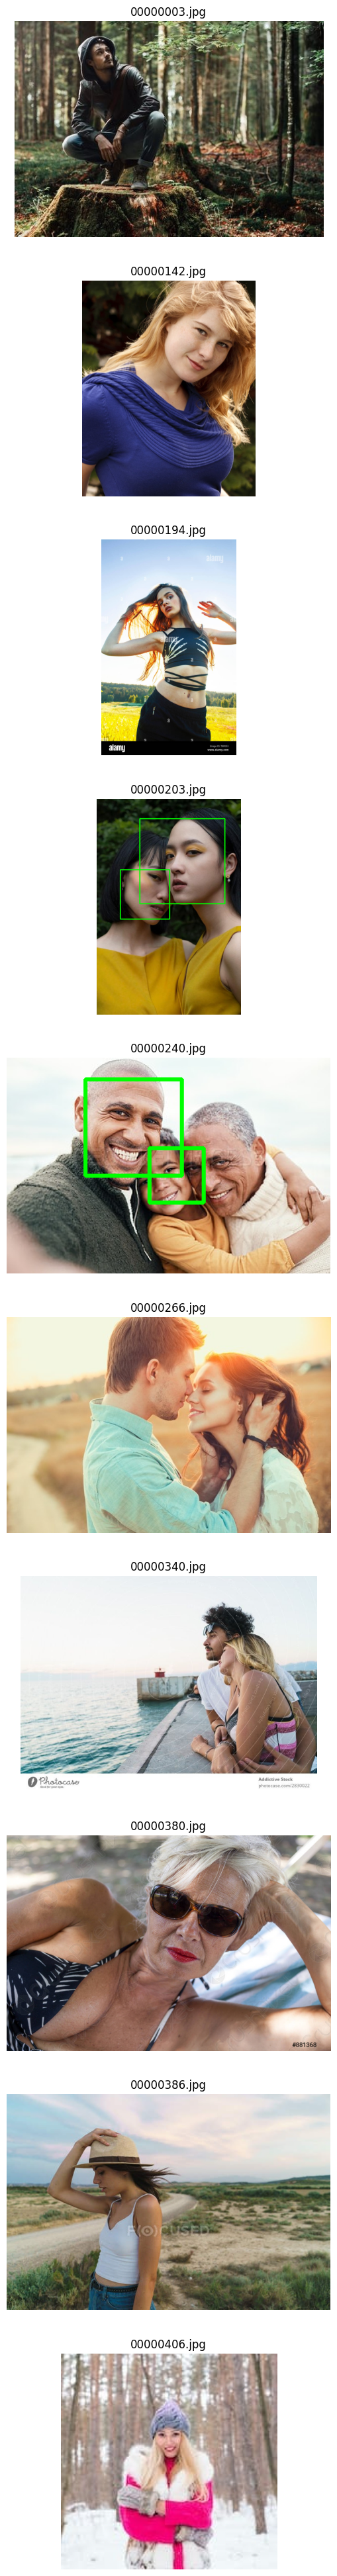

In [10]:
import matplotlib.pyplot as plt

def show(n, index, title, output):
  plt.subplot(n, 1, index+1)
  plt.imshow(output['result'], cmap='inferno')
  plt.title(title)
  plt.axis('off')

to_review = result['notDetectedRows']

indexes = range(0, 10)
n = len(indexes)

plt.figure(figsize=(80, 50))
for index in indexes:
  row = to_review[index]['row']
  output = to_review[index]['output']
  show(n, index, row.image_name, output)
plt.subplots_adjust(hspace=0.2)

In [2]:
# Test multiple minNeighbors
X = range(0, 15)
not_detected = []
falsePositives = []

input_dir = os.path.join('', 'data')
m_path = input_dir + '/faces.csv'
df_faces = pd.read_csv(m_path)
df_faces = df_faces.groupby('image_name').size().reset_index(name='faces_n')
total_faces = df_faces['faces_n'].sum()

for minNeighbors in X:
  result = evaluate(input_dir, df_faces, minNeighbors)
  falsePositives.append(result['falsePositives'])
  not_detected.append(result['notDetected']/total_faces)

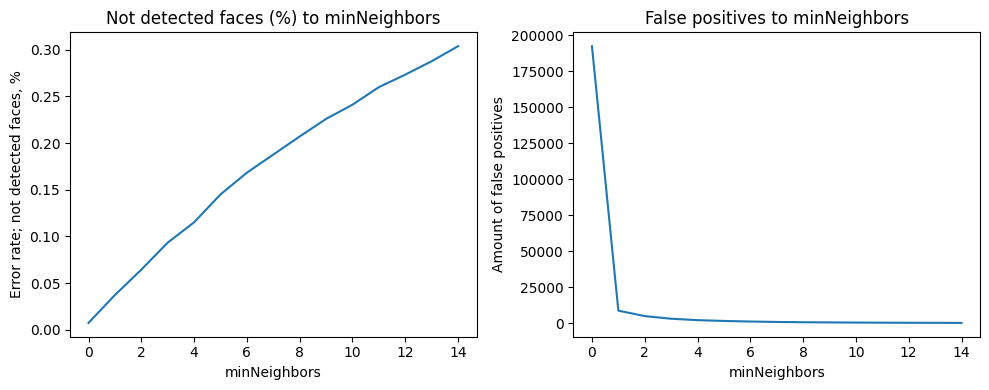

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].plot(X, not_detected)
axes[0].set_title('Not detected faces (%) to minNeighbors')
axes[0].set_xlabel('minNeighbors')
axes[0].set_ylabel('Error rate; not detected faces, %')

axes[1].plot(X, falsePositives)
axes[1].set_title('False positives to minNeighbors')
axes[1].set_xlabel('minNeighbors')
axes[1].set_ylabel('Amount of false positives')

plt.tight_layout()